## Estructurando un proyecto de DS - Parte II

# Introducción (Parte I): 
El presente trabajo tiene como objetivo elaborar un modelo predictivo utilizando las herramientas de data science. Para ello seleccioné el dataset referido a la deserción bancaria, es decir, a la pérdida o desgaste de clientes bancarios. Dicho prámetri está representado por la variable "Attrition_flag" y el término “Attition” se refiere al fenómeno en el que los clientes dejan de hacer negocios con un banco o se cambian a otro banco. Esta información es una métrica fundamental para los bancos, ya que afecta directamente a su base de clientes y a sus ingresos. Es por eso que resulta de mucha utilidad entender las principales variables que permitan anticipar la deserción bancaria. El presente trabajo tiene el objetivo de desarrollar un modelo de predicción para anticipar el porcentaje de clientes que abandanan el servicio (variable target).

El dataset elegido cuenta con 23 columnas con datos de: cliente, edad, estado del cliente (existente o “desgastado”), genero, nivel de educación, estado civil, categoría de ingresos, categoría de tarjeta de crédito, antigüedad, meses de inactividad, límite de crédito, límite disponible, total de transacciones, entre otras.

Antes de comenzar a trabajar el dataset podemos suponer que las categorías antes mencionadas pueden tener dependencia entre sí. Es decir, podríamos indagar si existe relación entre la edad de los clientes y su decisión de abandonar el servicio. 
Antes de comenzar proponemos plantear los siguientes interrogantes para entender la relación entre nuestras variables. En función de los datos obtenidos podremos elaborar nuestro modelo predictivo. La interacción o dependencia de los features nos permitirá entrenar a nuestro modelo predictivo.

# Preguntas e hipótesis (Parte II)
Siendo una base con información de clientes bancarios y el detalle de los clientes que abandonan el servicio queremos armar un modelo que permita precedir las variables que determinan que un cliente abandone el servicio. Para ello analizaremos:
¿En qué porcentaje los clientes abandonan el servicio?
¿Hay relación entre la edad de los clientes y el abandono del servicio?
¿Cómo se distribuye (%) los clientes que abandonan el servicio según el rango de sus ingresos informados?
¿Existe correlación entre mi variable target (abandono de clientes) y el resto de las variables del presente dataset?
¿Hay diferencias significativas en la distribución del límite crediticio entre los clientes y los que abandonan?
¿Los clientes de mayor edad están abandonando más que los más jóvenes?

A continuación realizaremos visualizaciones y tansformaciones de nuestras variables para avanzar en la elaboración de nuestro modelo de DS.

# Objetivo (Parte II): 
Nuestro objetivo es construir un modelo de predicción para clasificar si un cliente abandonará el servicio y la probabilidad de que un cliente abandone nuestro servicio bancario. 
 

# Contexto comercial (Parte II)
Soy el responsable del área de Servicio al cliente de un importante banco comercial y este año me solictaron desarrollar estratégias de retención de clientes para reducir en un 5% la cantidad de clientes que abandonan el banco dentro de los próximos 12 meses. Mi banco se desarrolla dentro de un sistema con alta competencia y bajas barreras de salida para nuestros clientes. 


# Problema comercial  (Parte II)
Sabemos que nuestros clientes reciben, al menos, 4 propuestas al año para cambiarse de banco por distintos beneficios. Sumado a la alta competencia, contamos con estadísticas que nos muestran que el 20% de nuestros clientes presenta al menos un reclamo durante su tiempo cómo cliente. Conocemos los principales motivos de queja y le damos seguimiento, sin embargo, no pudimos establecer el patrón entre los motivos de reclamo, la frecuencia y la deserción. Por lo tanto precisamos desarrollar un modelo que nos permita predecir el porcentaje de deserción. 


# Contexto analítico (Parte II)
Para poder desarrollar el modelo se cuenta con la siguiente información:
Base de datos con total de clientes de nuestro banco con el detalle de cada uno según: Edad, Sexo, Nivel educativo, estado civil, categoria de ingresos, categoria de tarjetade credito, antiguedad, años sin movimientos,límite de crédito, límite de reintegros, límite disponible, promedio de límite utilizado, entre otros.
Features: Nuestra base tiene 10.127 registros y 23 variables. No tenemos valores vacíos pero tenemos 14%, 7% y 11% de valores 'desconocidos' en las variables "nivel educativo", "estado civil" y "categoria de ingresos" respectivamente. Considerando que los porcentajes son bajos y que los mismos se presentan en variables categoricas que el cliente no quiso brindar vamos a tratar el valor desconocido como una categoria más. Posiblemente este problema se mantenga en futuros clientes y asumir un valor para dichos valores puede afectar al modelo. Es por eso que preferimos no completar con inferencias.

Variable Target: Binaria. Nuestra variable target será el parámetro de clientes que abandonan el servicio que en la base está representado por la columna "Attrition_flag".Indica un 1 si el cliente mantiene el servicio y 0 si decide abandonar el servicio.

A continuación exploraremos los datos con las herramientas de la librería pandas.crosstab para obtener gráficos que relacionen nuestra variable target con el resto de las características. Luego analizaremos la dependencia entre la variable target y el resto de las variables. Dado que nuestra base tiene la mayoría de sus variables categoricas las transformaremos en variables en numéricas para poder establecer la correlación entre las variables y obtener conclusiones. Finalmente elaboraremos nuevas variables que nos permita alimentar nuestro modelo predictivo con mayor precisión.


# EDA  (Parte II)
A continuación se desarrolla distintos análisis que permiten el análisis exploratorio de los datos. 

In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Libreria para estimar regresión
import statsmodels.formula.api as sm

# Libreria para PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
import gdown
import pandas as pd

url = 'https://drive.google.com/uc?id=1q-d4ynkoY0ryNcDBd7ABuO3kc1wSaRzU'
# Nombre del archivo local donde se descargará el CSV
Dataset_bankChurners = 'BankChurners.csv'

# Descarga del archivo CSV desde Google Drive
gdown.download(url, Dataset_bankChurners, quiet=False)

# Carga del archivo CSV en un DataFrame de pandas
df = pd.read_csv(Dataset_bankChurners)

# Muestra las primeras filas del DataFrame para verificar
print(df.head(2))

Downloading...
From: https://drive.google.com/uc?id=1q-d4ynkoY0ryNcDBd7ABuO3kc1wSaRzU
To: C:\Users\HP\Downloads\BankChurners.csv
100%|█████████████████████████████████████████████████████████████████████████████| 1.51M/1.51M [00:00<00:00, 4.65MB/s]


   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   

   Naive_Bayes_Cl

In [12]:
#Antes que nada mi variable target y otros atributos nominales en ordinales para poder trabajar su dependencia. 
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Ajustar y transformar la variable categórica en numéricas
df['Attrition_Flag'] = label_encoder.fit_transform(df['Attrition_Flag'])
df['Income_Category'] = label_encoder.fit_transform(df['Income_Category'])
df['Education_Level'] = label_encoder.fit_transform(df['Education_Level'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Card_Category'] = label_encoder.fit_transform(df['Card_Category'])


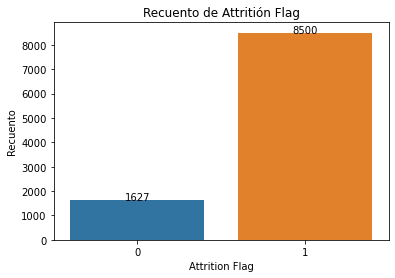

In [10]:
# Grafico univariado de total de clientes según si abandonaron el servicio"

plt.figure()
ax = sns.countplot(data=df, x='Attrition_Flag')

# Agregar etiquetas y título
plt.xlabel('Attrition Flag')
plt.ylabel('Recuento')
plt.title('Recuento de Attritión Flag')

# Agregar etiquetas con los valores de cada columna
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline')

# Mostrar el gráfico
plt.show()



Interpretación: Analizando la variable target (Attrition_Flag) en el gráfico univariado podemos inferir que la probabilidad de que un cliente nuevo abandone el servicio estará en el orden del 16% (1.627/10.127). Dado que este % es pequeño podemos inferir que el modelo elegido debería precedir una deserción cercana a este número. Nuestro interés como banco es que dicho porcentaje no aumente y desarrollar estrategias para que ese porcentaje, luego de aplicar nuestras estratégias, se reduzca al menos en 5 puntos.

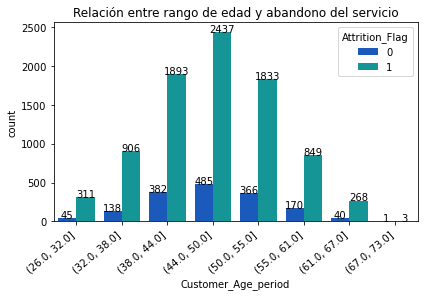

In [13]:
# Grafico bivariado de "Rango de edad y abandono del servicio"

df['Customer_Age_period'] = pd.cut(np.array(df['Customer_Age']), 
                                              bins=int(df.Customer_Age.std()),
                                              precision=0)

ax = sns.countplot(x="Customer_Age_period", hue='Attrition_Flag', data=df, palette="winter")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()


# Agregar etiquetas de valores en el gráfico
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline')

plt.title('Relación entre rango de edad y abandono del servicio')
plt.show()

Interpretación: vemos una relación entre el rango etario y el abando del servicio. 
Se mantiene cierta proporcionalidad para cada rango etário.
Con la presente información podemos alimentar nuestro modelo predictivo incluyendo los porcentajes en los cuáles los clientes abandonan el servicio para cada rango etáreo.

In [14]:
# Ahora analizamos la probabilidad de que un cliente abandone el servicio según su género

cross = pd.crosstab(df['Gender'], 
            df['Attrition_Flag'], 
            margins = True, 
            margins_name = "% row", 
            normalize='index')
display(cross)

Attrition_Flag,0,1
Gender,,
0,0.173572,0.826428
1,0.146152,0.853848
% row,0.160660,0.839340


Interpretación: A partir del presente cuadro podemos asumir que si el banco adquiere un nueve cliente masculino las probabilidades que abandone seran de 14% mientras que si es femenino las probabilidades ascienden a 17%. 
Este análisis permitirá especificar a nuestro modelo una probabilidad condicional respecto al genero y nuestra variable target.

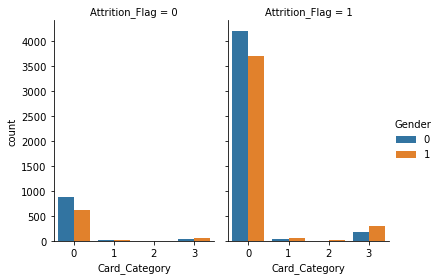

In [15]:
sns.catplot(x="Card_Category", hue="Gender", col="Attrition_Flag",
                data=df, kind="count",
                height=4, aspect=.7);


Interpretación: similar al cuadro anterior en el presente gráfico vemos que los clientes que abandonan el servicio (Attrition_flag=0) mantienen una relación abierta por tipo de tarjeta similar a los clientes que mantienen el servicio. Para definir nuestro modelo podríamos obtener los % de cada combinación.

A continuación realizaremos gráfico multivariado.
Antes de realizar un cuadro de correlación elimino las columnas que no aportan valor a la visualización

In [16]:
df = df.iloc[:, 1:-3]
#elimino las columnas que no aportan valor a mi siguiente cuadro de correlación

<AxesSubplot:>

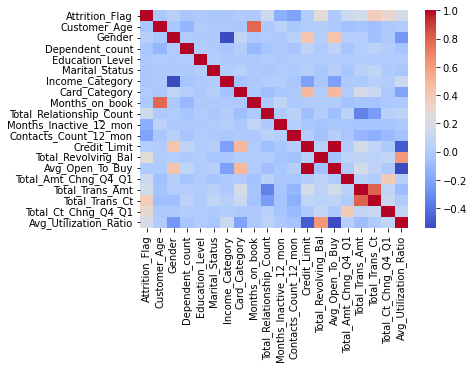

In [17]:
# Matriz de correlación de todos las variables

corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm")

Interpretación: realizamos este gráfico de correlación para evidenciar las dependencias de las variables de nuestro dataset. Vemos que Credit limit está correlacionado con Average open to Buy y Month on book está correlacionado con Customer Age. Ese gráfico nos da elementos para entrenar a nuestro futuro modelo de DS. Sin embargo nuestra variable target (Attrition_Flag) no muestra -con este método - dependencia fuerte con otras variables.

In [18]:
# Matriz de correlacion
df[['Customer_Age','Attrition_Flag']].corr(method='pearson')

,Customer_Age,Attrition_Flag
Customer_Age,1.000000,-0.018203
Attrition_Flag,-0.018203,1.000000


In [19]:
# list of features name that are int64, object, and float64
s = (df.dtypes == 'object')
cat_cols = list(s[s].index)
print(f"{len(cat_cols)} Categorical features:\n{cat_cols}")

s = (df.dtypes == 'float64')
float64_cols = list(s[s].index)
print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")

s = (df.dtypes == 'int64')
int64_cols = list(s[s].index)
print(f"\n{len(int64_cols)} int features:\n{int64_cols}")
del s

0 Categorical features:
[]

5 float64 features:
['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

15 int features:
['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct']


In [20]:
s = (df.dtypes == np.number)
num_cols = list(s[s].index)
print(f"\n{len(num_cols)} numpy.number features::\n{num_cols}")
del s


5 numpy.number features::
['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [21]:
cat_df = df[cat_cols].apply(lambda x : pd.factorize(x)[0])
cat_df.info()

<class 'pandas.core.series.Series'>
Index: 0 entries
Series name: None
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 0.0+ bytes


In [3]:
concat_df = pd.concat([cat_df, df[int64_cols]], axis=1)
concat_df.info()

NameError: name 'cat_df' is not defined

In [2]:
len(concat_df.columns)


NameError: name 'concat_df' is not defined

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency

# A continuación podemos ver la correlación entre Attrition flag y la cantidad de años de falta de actividad
# Selecciona las columnas de interés
data = df[['Attrition_Flag', 'Months_Inactive_12_mon']]

# Realiza una tabla de contingencia entre las dos columnas
tabla_contingencia = pd.crosstab(data['Attrition_Flag'], data['Months_Inactive_12_mon'])

# Realiza la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# Imprime el resultado
print(f"Valor de chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
print(f"Grados de libertad: {dof}")
print("Valores esperados:")
print(expected)

NameError: name 'df' is not defined

Interpretación: Dado que el valor de chi-cuadrado es de 396.45619934093764 y es bastante grande, lo que sugiere que hay una relación significativa entre las variable de meses de inactividad y el parametro que indica que el cliente abandona el servicio. 

Valor p: 1.6155198022595323e-82 : El valor p es extremadamente pequeño (cercano a cero). Esto indica que la probabilidad de que la asociación observada entre las dos variables sea el resultado del azar es casi nula. En otras palabras, hay evidencia sólida para rechazar la hipótesis nula de independencia y concluir que hay una asociación significativa entre el abandono de clientes y los meses de inactividad.

In [26]:
# list of features name that are int64, object, and float64
s = (df.dtypes == 'object')
cat_cols = list(s[s].index)
print(f"{len(cat_cols)} Categorical features:\n{cat_cols}")

s = (df.dtypes == 'float64')
float64_cols = list(s[s].index)
print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")

s = (df.dtypes == 'int64')
int64_cols = list(s[s].index)
print(f"\n{len(int64_cols)} int features:\n{int64_cols}")
del s

0 Categorical features:
[]

5 float64 features:
['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

15 int features:
['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct']


# Feature 1 
Customer_Age_period: nueva categoría que determina intervalos de edad de los clientes. Los límites de los intervalos se determinan utilizando la desviación estándar de las edades, y los valores en la columna 'Customer_Age' se asignan a los intervalos correspondientes en función de sus valores numéricos. Esto es útil para agrupar edades en categorías basadas en la variabilidad de los datos.

In [81]:
df['Customer_Age_period'] = pd.cut(np.array(df['Customer_Age']), 
                                              bins=int(df.Customer_Age.std()),
                                              precision=0)

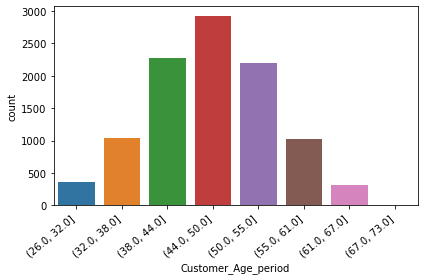

In [82]:
ax = sns.countplot(x="Customer_Age_period", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

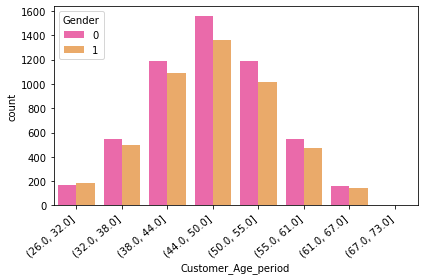

In [83]:
ax = sns.countplot(x="Customer_Age_period", hue='Gender', data=df, palette="spring")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

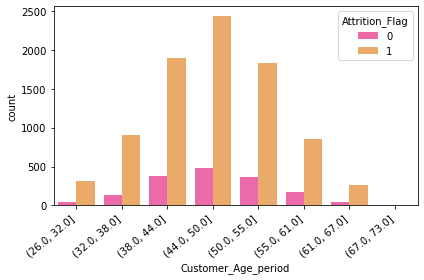

In [84]:
ax = sns.countplot(x="Customer_Age_period", hue='Attrition_Flag', data=df, palette="spring")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

In [85]:
df['Customer_Age_period'] = label_encoder.fit_transform(df['Customer_Age_period'])

In [86]:
# Construyo variable acotada de los rangos de antiguedad
# Defino cortes
bin_edges = [20, 38, 55, 73]
bin_labels = ['Joven','Adultos','Tercera Edad']
df['Customer_Age_period'] = pd.cut(df['Customer_Age'], 
                                  bins = bin_edges, 
                                  labels = bin_labels, 
                                  include_lowest = True)

Text(0, 0.5, 'Cantidad de clientes')

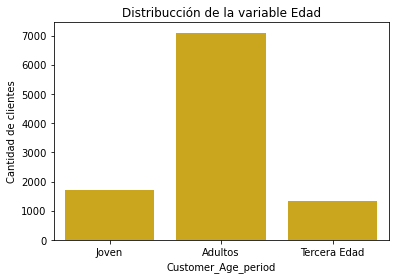

In [87]:
# Cantidad de casos por categoría 
plt.figure()
sns.countplot(data = df,
              x = 'Customer_Age_period',
             color = '#E7B602')
plt.title('Distribucción de la variable Edad')
plt.ylabel('Cantidad de clientes')

In [92]:
df['Customer_Age_period'] = label_encoder.fit_transform(df['Customer_Age_period'])


In [93]:
coeficiente = df[['Attrition_Flag','Customer_Age_period']].corr(method='pearson')
coeficiente

,Attrition_Flag,Customer_Age_period
Attrition_Flag,1.00000,0.01859
Customer_Age_period,0.01859,1.00000


Interpretación: Siendo que la correlación es muy cercana a cero verificamos que la correlación insignificante entre nuestra variable target y nuestra variable de rangos de edad. En conclusión el future no nos sirve para alimentar a nuestro modelo.

# Feature 2
Month on books period: nueva categoría que determina intervalos de la antiguedad de los clientes.
Los límites de los intervalos se determinan utilizando la desviación estándar de la antiguedad, y los valores en la columna 'Customer_Age' se asignan a los intervalos correspondientes en función de sus valores numéricos. Esto es útil para agrupar edades en categorías basadas en la variabilidad de los datos.

Number of unique values for 'Months_on_book' feature: 44


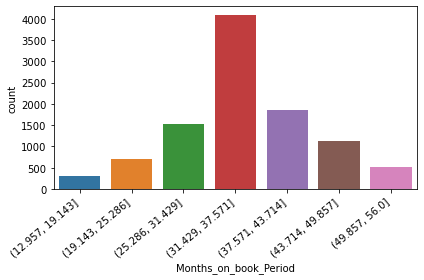

In [31]:
print(f"Number of unique values for 'Months_on_book' feature: {df['Months_on_book'].nunique()}")
df['Months_on_book_Period'] = pd.cut(df['Months_on_book'],
                                                bins=int(df['Months_on_book'].std()))
ax = sns.countplot(x="Months_on_book_Period", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

Number of unique values for 'Months_on_book' feature: 44


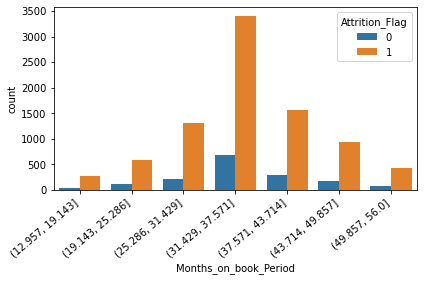

In [94]:
print(f"Number of unique values for 'Months_on_book' feature: {df['Months_on_book'].nunique()}")
df['Months_on_book_Period'] = pd.cut(df['Months_on_book'],
                                                bins=int(df['Months_on_book'].std()))
ax = sns.countplot(x="Months_on_book_Period", hue='Attrition_Flag', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

In [95]:
df['Months_on_book_Period'] = label_encoder.fit_transform(df['Months_on_book_Period'])


In [96]:
# Matriz de correlacion
df[['Months_on_book_Period','Attrition_Flag']].corr(method='pearson')

,Months_on_book_Period,Attrition_Flag
Months_on_book_Period,1.000000,-0.013317
Attrition_Flag,-0.013317,1.000000


Interpretación: siendo la correlación negativa podemos concluir que el future creado no sirve para alimentar nuestro modelo.

Por lo tanto volvemos a analizar nuestras variables en relación a nuestra variable target para ver cuál puede ayudarnos a alimentar nuestro modelo.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

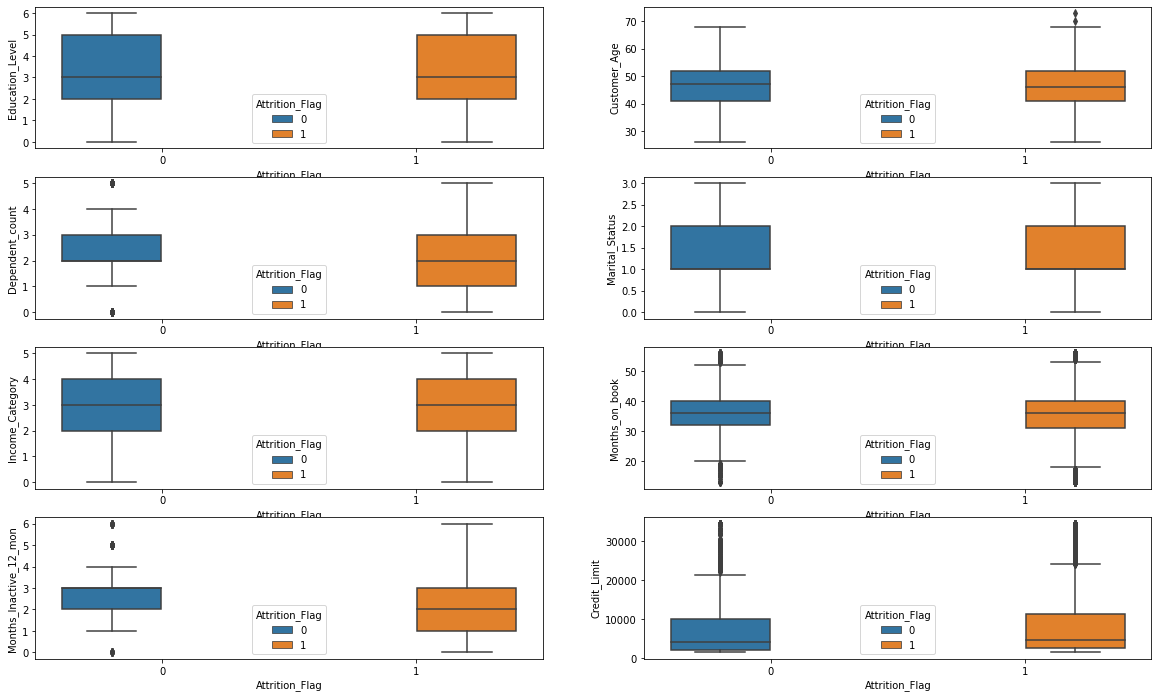

In [57]:
    # Relations based on the continuous data attributes
    fig, axarr = plt.subplots(4, 2, figsize=(20, 12))
    sns.boxplot(y='Education_Level',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = df, ax=axarr[0][0])
    sns.boxplot(y='Customer_Age',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = df , ax=axarr[0][1])
    sns.boxplot(y='Dependent_count',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = df, ax=axarr[1][0])
    sns.boxplot(y='Marital_Status',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = df, ax=axarr[1][1])
    sns.boxplot(y='Income_Category',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = df, ax=axarr[2][0])
    sns.boxplot(y='Months_on_book',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = df, ax=axarr[2][1])
    sns.boxplot(y='Months_Inactive_12_mon',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = df, ax=axarr[3][0])
    sns.boxplot(y='Credit_Limit',x = 'Attrition_Flag', hue = 'Attrition_Flag',data = df, ax=axarr[3][1])

De los gráficos anteriores vemos que "Month_inactive_12_mon","Credit limit" y "dependent_count" muestra que los clientes que no mantienen el servicio no mantienen relación con los clientes existentes. A continuación nos proponemos contruir future para estas 3 variables.

In [99]:
# Matriz de correlacion
df[['Education_Level','Attrition_Flag']].corr(method='pearson')

,Education_Level,Attrition_Flag
Education_Level,1.000000,-0.005551
Attrition_Flag,-0.005551,1.000000
